<a href="https://colab.research.google.com/github/FatimaMHelmy/Head-pose-estimation-using-ML-/blob/main/Creat_dataset_all_points.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installatin
> ####  [Media pipe](https://google.github.io/mediapipe/solutions/face_mesh.html) is an open-source cross-platform framework for building multimodel machine learning pipelines.


In [1]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.0/33.0 MB 17.8 MB/s eta 0:00:00


# Preparing Dataset for Pose Estimation
**we are using [AFLW2000](https://paperswithcode.com/dataset/aflw2000-3d)**

AFLW2000-3D is a dataset of 2000 images that have been annotated with image-level 68-point 3D facial landmarks. This dataset is used for evaluation of 3D facial landmark detection models. The head poses are very diverse and often hard to be detected by a CNN-based face detector.

#### link for download the data
### http://www.cbsr.ia.ac.cn/users/xiangyuzhu/projects/3DDFA/Database/AFLW2000-3D.zip



### We have first imported the necessary libraries that will help in creating the dataset. Then in the next  lines, we are importing the modules required to extract key points and their draw utils.



> ### I chossed MediaPipe Face Mesh which depends on BLAZE FACE MODEL ,(one of the best 9 models for pose detection), for extarcting the key points   || for mor information chech this >>  [ MediaPipe Face Mesh](https://google.github.io/mediapipe/solutions/face_mesh.html)



### Load the libraries

In [2]:
import mediapipe as mp
import cv2
import time
import numpy as np
import pandas as pd
import os 
from os import path 
import scipy.io as sio  # to read the mat file in the data 

### In the above snippet of code, we have first imported the necessary libraries that will help in creating the dataset. Then in the next lines, we are importing the modules required to extract key points and their draw utils. 
>>  The FaceMesh object from the Mediapipe library. This object will detect faces and also detect keypoints from one or more faces.

>>  The VideoCapture object from the OpenCV library. This object will be used for retrieving images from the webcam. We set a parameter on the object with 0 for retrieving images from the webcam.





In [3]:
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True)
cap = cv2.VideoCapture(0) 

#face_mesh = mp_face_mesh.FaceMesh(min_detection_confidence=0.5, min_tracking_confidence=0.5)
#face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1,refine_landmarks=True,min_detection_confidence=0.5)


 !!!!!!!!!!!!! Google colab crashes if you try to display image using cv2.imshow() instead import from g::oogle.colab.patches import cv2_imshow and display using cv2_imshow(<image>)

In [4]:
from google.colab.patches import cv2_imshow    


## This function takes an image and return the face landmarks 

 For your information, the OpenCV and the Mediapipe library read their image differently.

On the OpenCV library, the image is in BGR color space. Meanwhile, the mediapipe library needs an image with RGB color space.

Therefore, we need to convert the color space to RGB first, apply face landmark detection, then convert it back to BGR color space.

In [7]:
## this function takes the image path and return it's keypoints 
def get_results(img_path): 
      # Read the image 
      ## check first if this img exist or not 
  if os.path.isfile(img_path):    
    image = cv2.imread(img_path)
        # Convert the color space from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # To improve performance
    image.flags.writeable = False

        # Get the results [it contains all the landmarks and thire dimentions  ]
    results = face_mesh.process(image)

        # To improve performance
    image.flags.writeable = True

        # Convert the color space from RGB to BGR
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    if (results.multi_face_landmarks) != None:
      return(results,image)
    else:
      
      return(None , None )  

  else:
    return(None , None )    

### let's make sure that we selected the correct points. 

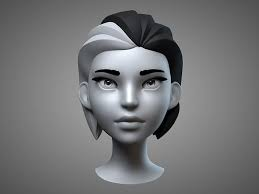

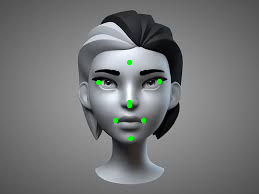

In [10]:
## selected six points indexs 
landmarks_indx=[33,263,1,61,291,199,151,4]
## loop to get points dimentions (x,y)
results,image=get_results('/content/index.jpg')
cv2_imshow(image)

for key_point in results.multi_face_landmarks:
  for idx,landmark in enumerate(key_point.landmark):
    if idx in landmarks_indx:
     # print(idx,landmark)
      x = landmark.x
      y = landmark.y
      # note: the x and y values are scaled to the their width and height so we will get back their actual value in the image
      shape = image.shape 
      relative_x = int(x * shape[1])
      relative_y = int(y * shape[0])
    
      cv2.circle(image, (relative_x, relative_y), radius=1, color=(0, 255, 0), thickness=2)
      #cv2.putText(image , str(idx) ,  (relative_x, relative_y), cv2.FONT_HERSHEY_SIMPLEX, 
                   #0.4, (0, 0, 255), 1, cv2.LINE_AA)
      
cv2_imshow(image)



:### ****

### Read the images from the zip file and store their keypoints and Eular angles  in the empty data frame 
>> we have the images and their angles (stored in mat file)

#### I uploaded the file in my drive.

In [ ]:
# connect with your drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## extract the zip file in your drive 
%%capture
!unzip /content/drive/MyDrive/DATA/AFLW2000-3D.zip -d /content/drive/MyDrive/DATA

## Fill our data frame with the points of each picture in AFLW2000 folder which stored in "/content/drive/MyDrive/DATA/AFLW2000"

In [ ]:
## selected six points indexs if you want to work in the points which determine the face 
"""landmarks_indx={1:"nose", 61:"left corner of the mouth", 33:"left corner of the left eye",
                199:"chin", 263:"right corner of the right eye", 291:"right corner of the mouth"}"""

# creat an empty dataset to store points  & eular angles in it
data = pd.DataFrame() 

# assign directory of images and their matlap file 
directory = '/content/drive/MyDrive/DATA/AFLW2000'
 
# iterate over image_files in  that directory
lst_files = os.listdir(directory)
lst_files.sort()
counter=0
for filename in lst_files:
 
  # creat empty dictionry to store points in it after appending them in the dataframe
    data_points_x = dict()
    data_points_y = dict()
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
      img_path = os.path.join(directory, filename)

        ## call the function get_results to get the image points
      results,image = get_results(img_path)
  #  select required points and store them in data_points dictionary 
      if results != None : 
        
        ## loop to get points dimentions (x,y)
# start of second loop 
        for key_point in results.multi_face_landmarks:

          for idx,landmark in enumerate(key_point.landmark):
            x = landmark.x
            y = landmark.y

            ## append dimentions in the data frame 
            data_points_x[f"{idx}"+"_x"] = x
            data_points_y[f"{idx}"+"_y"] = y


# end  of second loop 

        dist_x = data_points_x["152_x"]-data_points_x["10_x"]
        dist_y = data_points_y["152_y"]-data_points_y["10_y"]
        distance = (dist_x**2 + dist_y**2)**0.5

        # normalized to the face position inside the images and center them around the nose 
        center_x =  data_points_x["4_x"]
        center_y =  data_points_y["4_y"]
        for i , j in zip(data_points_x,data_points_y):
          data_points_x[i] = (data_points_x[i] - center_x)/distance
          data_points_y[j] = (data_points_y[j] - center_y)/distance

        # conactinate bet two dic to append them in data set 
        data_points_x.update(data_points_y)
        data_points = data_points_x

          ## read matlap file which contains Eular angles
        mat_file = sio.loadmat(img_path[:-4]+'.mat')

          ## append eular angles  in the data_points dic  
        data_points["pitch"],data_points["yaw"],data_points["roll"] = mat_file["Pose_Para"][0][:3]

          ## append all  in the data frame 
        data = data.append(data_points,ignore_index=True)

# end of first loop 

## store the final_dataframe in csv file 
data.to_csv("/content/dataset.csv")  

